## Mutable Data

We need strategies to help us structure large systems to be modular, to be separately developed and maintained.   
One **technique** for creating modular programs is **to incorporate data that may change state over time**.   
A single data object can represent something that evolves independently of the rest of the program.And the behavior of a changing object may be influenced by its history(An **entity** in the world).   
Adding state to data is a central ingredient of a paradigm called  *object-oriented programming*.

OOP:
- Objects are the heart of oop, which is an approach to programming that allows us to organize large programs using a central metaphor. A bunch of objects communicating with each other by sending messages back and forth.
- Special syntax that can improve the composition of programs

### The Object Metaphor
*Objects* combine data values with behavior.    
Objects represent information, and also behave like the thing they represent.     
Objects are both information and processes, bundled together to represent the properties, interactions, and behaviors of complex. 

- *class*: a type of object; classes are first-class values in Python   
- *instance*   
Instances can be *constructed* by calling the class on arguments that charaterize the instance.

In [3]:
#class named date
from datetime import date
#instance constructed from class
fri = date(2023, 8, 11)

In [4]:
# instance fri behaves like class date
print(date(2023, 8, 11) - fri)

0:00:00


Objects have *attributes*: named values that are part of the object.   
Use dot notation to designated an attribute of an object.     
`<expression>.<name>`   
Attribute names are not available in the general environment, but are particular to the object instance.

In [5]:
fri.year

2023

Obejcts also have *methods*: function-valued attributes.   
Methods are functions that compute their results both from their object and arguments.

In [7]:
#string format of time, takes a single argument
#that specifies how to display a date
fri.strftime("%A, %B %d")

'Friday, August 11'

All values in Python are objects:
- All objects have attributes
- A lot of data manipulation happens through object methods
- Functions do one thing; objects do many related things.

### Sequence Objects
Instances of primitive built-in values such as numbers are *immutable*: The values themselves cannot change over the course of program execution.   
*Mutable* objects are used to represent values that be changed by *mutating* operations or others.


- List modification operations

In [8]:
chinese = ['coin', 'string', 'myriad']
suits = chinese

In [9]:
suits.pop() #remove and return the final element

'myriad'

In [10]:
suits.remove('string') 
# remove the first element that equals the argument

In [11]:
suits.append('cup')

In [12]:
suits.extend(['sword', 'club'])
# add all elements of a sequence to the end

In [13]:
suits[2] = 'spade'

In [14]:
suits

['coin', 'cup', 'spade', 'club']

In [17]:
suits[0:2] = ['heart', 'diamond']
# replace a slice

In [16]:
suits

['heart', 'diamond', 'spade', 'club']

Methods also exist for inserting, sorting and reversing lists.   
All these mutation operations change the value of the list; they donot create new list objects.

- **Sharing and Identity**   
with mutable data, methods called on one name can affect another name.As they all point to the same object.
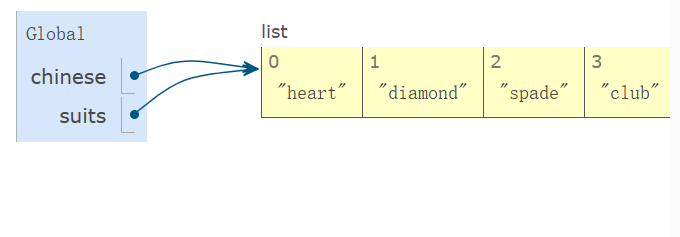

In [18]:
chinese

['heart', 'diamond', 'spade', 'club']

List can be copied using `list` constructor function.     
Changes to one list do not affect another, unless they **share structure**.

In [19]:
nest = list(suits)
nest[0] = suits # share structure
suits.insert(2, 'Joker')
suits

['heart', 'diamond', 'Joker', 'spade', 'club']

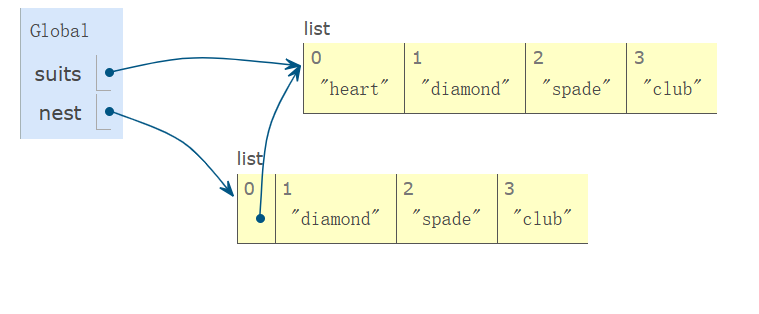

In [20]:
nest

[['heart', 'diamond', 'Joker', 'spade', 'club'], 'diamond', 'spade', 'club']

In [21]:
nest[0].pop(2)
suits

['heart', 'diamond', 'spade', 'club']

To test whether 2 objects are the same, two comparison operators: `is` and `is not`

In [23]:
suits is nest[0]

True

`is` checks for identity

In [25]:
suits is ['heart', 'diamond', 'spade', 'club']

False

`==` checks for the equality of contents

In [26]:
suits == ['heart', 'diamond', 'spade', 'club']

True

- **List comprehension**   
A list comprehension always creates a new list

- **Tuple**
A tuple, an instance of the built-in `tuple` type, is an **immutable** sequence.   
Created using a tuple literal that separates element expressions by commas. Parentheses are optional.


In [27]:
1, 2 + 3

(1, 5)

In [28]:
type((10, 20))

tuple

Empty and one-element tuples have special literal syntax.

In [29]:
()

()

In [30]:
(10,)

(10,)

Tuples have finite length and support element selection.   
Other few methods also available for lists e.g.`count` and `index`

In [31]:
code = ("up", "up", "down", "down") + ("left", "right") * 2

In [32]:
len(code)

8

In [50]:
"up" in code

True

In [33]:
code.index("up")

0

In [34]:
code.count("down")

2

The methods for manipulating the contents are not available, we cannot change which elements are in a tuple.   

We can change the value of a mutable element contained within a tuple.
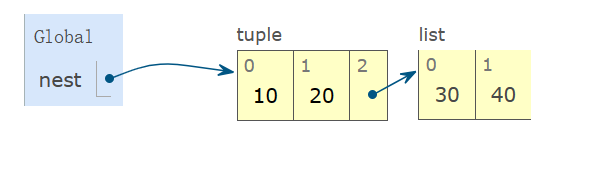

In [35]:
nest = (10, 20, [30, 40])
nest[2].pop()

40

Tuples are used implicitly in multiple assignment. An assignment of 2 values to 2 names creates a 2-element tuple and then unpackes it.

- **String** Example 
Strings are object, having attributes.   
There is an encoding of strings as numbers
- ASCII
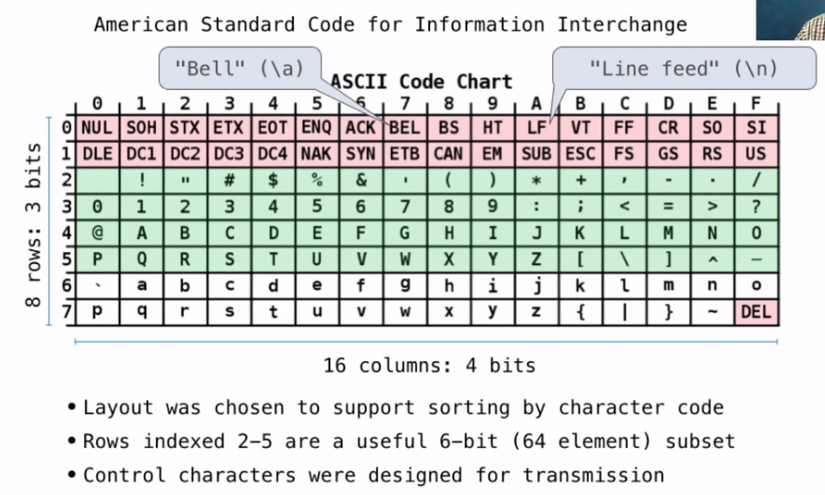

In [42]:
ord('A')
#get the unicode value of a character/here is ASCII value

65

In [41]:
hex(ord('A'))
#convert the value to hexadecimal format

'0x41'

- Unicode
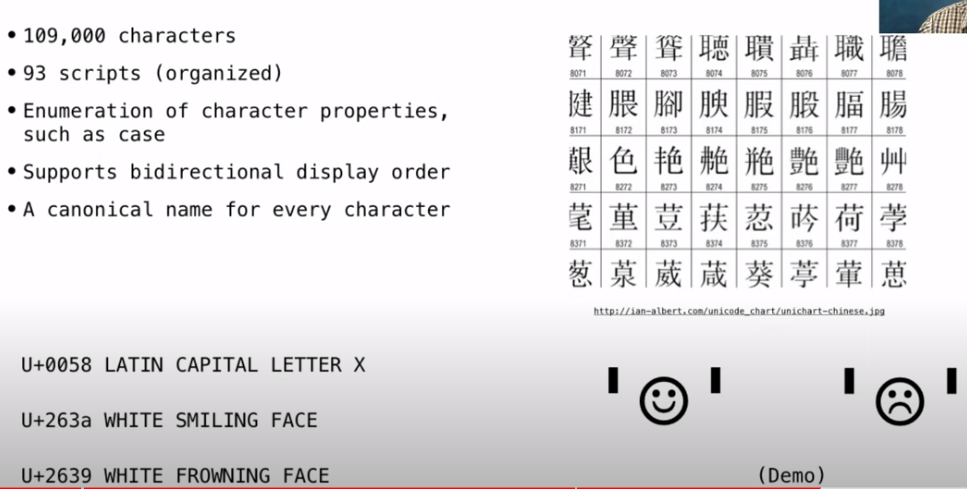

In [37]:
from unicodedata import name, lookup

In [43]:
name('A')

'LATIN CAPITAL LETTER A'

In [38]:
lookup("BABY")

'👶'

In [39]:
lookup("BABY").encode()

b'\xf0\x9f\x91\xb6'

#### Mutation Can Happen Within a Function Call
A function can change the value of any object in its scope.

In [46]:
def mystery(s):
    s.pop()
    s.pop()

four = [1, 2, 3, 4]
mystery(four)
four

[1, 2]

In [47]:
four = [1, 2, 3, 4]
def another_mystery():
    four.pop()
    four.pop()

another_mystery()

In [48]:
four

[1, 2]

#### Mutable Default Arguments are Dangeroous
A default argument value is part of a function value, not gengerated by a call.
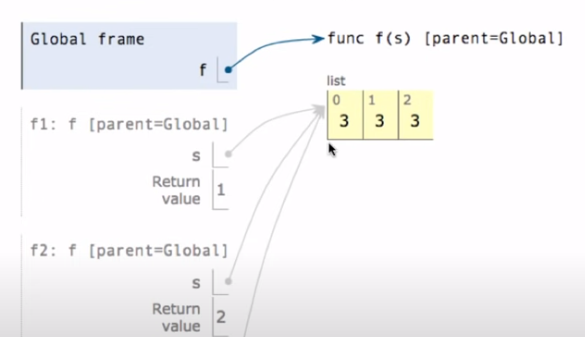

In [56]:
def f(s=[]):
    s.append(3)
    return len(s)

In [57]:
f()

1

In [63]:
f()

3

#### Mutable Functions
- Mutable Values & Persistent Local State

In [59]:
def make_withdrawal_list(balance):
    b = [balance]
    def withdraw(amount):
        if amount > b[0]:
            return 'Insufficient funds'
        else:
            b[0] = b[0] - amount
            return b[0]
    return withdraw

In [60]:
withdraw = make_withdrawal_list(100)

In [61]:
withdraw(50)

50

In [62]:
withdraw(70)

'Insufficient funds'

### Local State
Lists and dictionaries have *local state*:   
they are changing values that have some particular contents at any point in the execution of a program.

Functions can also have local state.

In [ ]:
def make_withdrawal(balance):
    def withdraw(amount):
        nonlocal balance
        if amount > balance:
            return 'Insufficient funds'
        else:
            balance = balance - amount
            return balance
    return withdraw

`nonlocal` statement indicates that the name appears somewhere in the env except the first(local) frame or the last(global) frame.

A locally defined function can look up names outside of its local frames.Only after a `nonlocal` statement can a function change the binding of names in these frames

By introducing `nonlocal` statements, we have created a dual role for assignment statements: changing local bindings or changing nonlocal bindings.

**Python Particulars**. Nonlocal assignment is often the default behavior of assignment in many other languages with higher-order functions and lexical scope.(not require `nonlocal`)   
In Python, within the body of a function, all instances of a name must refer to the same frame. Thus Python cannot look up a name in a non-local frame, then bind the same name in the local frame.

In [65]:
def make_withdrawal(balance):
    def withdraw(amount):
        if amount > balance:
            return 'Insufficient funds'
        else:
            balance = balance - amount
            return balance
    return withdraw

In [66]:
withdraw = make_withdrawal(100)
withdraw(20)

UnboundLocalError: cannot access local variable 'balance' where it is not associated with a value

Error reason:
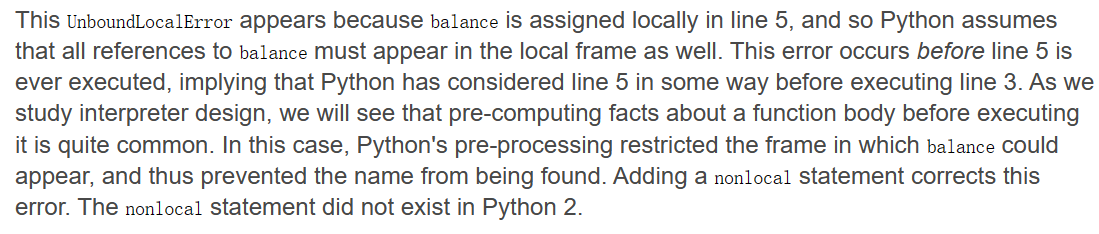

to be continued...